## School Grades Dataset

Source: Florida Department of Education

#### Importing libraries and school dataset

In [1]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib as mpl
from shapely.geometry import Point, Polygon

In [2]:
# School grades data is from http://www.fldoe.org/accountability/accountability-reporting/school-grades/
# Dataset url: http://www.fldoe.org/core/fileparse.php/18534/urlt/SchoolGrades19.xls
# School address and coordinates is from http://doeweb-prd.doe.state.fl.us/EDS/MasterSchoolID/index.cfm

# In this notebook we will use a dataset that was created by combining the two datasets above and filtering to keep
### data from Miami-Dade and Broward counties only 

schools = pd.read_csv('../Data/education/Florida School Grades/School Grades Dataset Dade-Broward.csv', sep=';', dtype='unicode')

In [3]:
schools.head()

District Name School Number                        School Name  \
0       BROWARD          0011  DEERFIELD BEACH ELEMENTARY SCHOOL   
1       BROWARD          0021        POMPANO BEACH MIDDLE SCHOOL   
2       BROWARD          0031     OAKLAND PARK ELEMENTARY SCHOOL   
3       BROWARD          0041       NORTH SIDE ELEMENTARY SCHOOL   
4       BROWARD          0101            DANIA ELEMENTARY SCHOOL   

                                    Physical Address                  City  \
0  650 NE 1ST ST                                 ...  DEERFIELD BEACH        
1  310 NE 6TH ST                                 ...  POMPANO BEACH          
2  936 NE 33RD ST                                ...  OAKLAND PARK           
3  120 NE 11TH ST                                ...  FORT LAUDERDALE        
4  300 SE 2ND AVE                                ...  DANIA BEACH            

  State    ZIP Code  Latitude  Longitude Percent of Total Possible Points  \
0    FL  33441-3507  26.31981   -80.0953                               52   
1    FL  33060-6208  26.23615  -80.12056                               48   
2    FL  33334-2716  26.16793  -80.13531                               51   
3    FL  33304-1927  26.13794  -80.14303                               50   
4    FL  33004-4112  26.04693  -80.14234                               65   

   ... Grade 2008 Grade 2007 Grade 2006 Grade 2005 Grade 2004 Grade 2003  \
0  ...          A          A          A          A          A          C   
1  ...          A          C          B          B          B          B   
2  ...          A          A          C          A          A          B   
3  ...          D          B          B          C          C          D   
4  ...          A          A          B          B          B          C   

  Grade 2002 Grade 2001 Grade 2000 Grade 1999  
0          B          A          C          C  
1          B          C          C          C  
2          A          A          C          C  
3          C          D          D          D  
4          C          C          C          D  

[5 rows x 31 columns]

In [4]:
schools.describe()

District Name School Number                 School Name  \
count            735           735                         735   
unique             2           644                         728   
top       MIAMI-DADE          2881  TROPICAL ELEMENTARY SCHOOL   
freq             443             2                           2   

                                         Physical Address  \
count                                                 735   
unique                                                687   
top     12425 SW 72ND ST                              ...   
freq                                                    3   

                        City State    ZIP Code  Latitude  Longitude  \
count                    735   735         735       735        735   
unique                    52     1         678       684        680   
top     MIAMI                   FL  33029-1916  25.70155  -80.32559   
freq                     236   735           4         3          3   

       Percent of Total Possible Points  ... Grade 2008 Grade 2007 Grade 2006  \
count                               730  ...        556        546        535   
unique                               61  ...          5          6          5   
top                                  54  ...          A          A          A   
freq                                 37  ...        307        263        329   

       Grade 2005 Grade 2004 Grade 2003 Grade 2002 Grade 2001 Grade 2000  \
count         521        513        499        484        470        456   
unique          5          6          6          6          5          6   
top             A          A          A          A          C          C   
freq          253        240        193        175        185        169   

       Grade 1999  
count         451  
unique          5  
top             D  
freq          187  

[4 rows x 31 columns]

In [5]:
#Convert Latitude and Longitude to type float
schools['Latitude'] = schools['Latitude'].astype(float)
schools['Longitude'] = schools['Longitude'].astype(float)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001429C40CF98>,
      dtype=object)

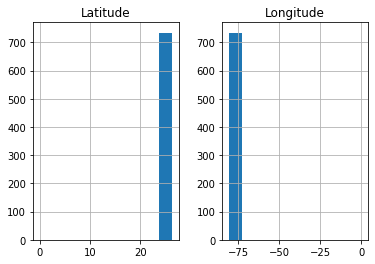

In [6]:
schools.hist()

In [7]:
schools['Latitude'].replace(0, np.nan, inplace=True)
schools['Longitude'].replace(0, np.nan, inplace=True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001429C888390>,
      dtype=object)

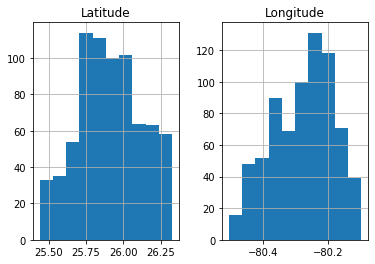

In [8]:
schools.hist()

In [9]:
#schools.dropna()
schools.describe()

Latitude   Longitude
count  734.000000  734.000000
mean    25.908704  -80.276618
std      0.215274    0.094762
min     25.440060  -80.507460
25%     25.755650  -80.353090
50%     25.897225  -80.265030
75%     26.064982  -80.204705
max     26.325750  -80.095300

In [10]:
schools[:5]

District Name School Number                        School Name  \
0       BROWARD          0011  DEERFIELD BEACH ELEMENTARY SCHOOL   
1       BROWARD          0021        POMPANO BEACH MIDDLE SCHOOL   
2       BROWARD          0031     OAKLAND PARK ELEMENTARY SCHOOL   
3       BROWARD          0041       NORTH SIDE ELEMENTARY SCHOOL   
4       BROWARD          0101            DANIA ELEMENTARY SCHOOL   

                                    Physical Address                  City  \
0  650 NE 1ST ST                                 ...  DEERFIELD BEACH        
1  310 NE 6TH ST                                 ...  POMPANO BEACH          
2  936 NE 33RD ST                                ...  OAKLAND PARK           
3  120 NE 11TH ST                                ...  FORT LAUDERDALE        
4  300 SE 2ND AVE                                ...  DANIA BEACH            

  State    ZIP Code  Latitude  Longitude Percent of Total Possible Points  \
0    FL  33441-3507  26.31981  -80.09530                               52   
1    FL  33060-6208  26.23615  -80.12056                               48   
2    FL  33334-2716  26.16793  -80.13531                               51   
3    FL  33304-1927  26.13794  -80.14303                               50   
4    FL  33004-4112  26.04693  -80.14234                               65   

   ... Grade 2008 Grade 2007 Grade 2006 Grade 2005 Grade 2004 Grade 2003  \
0  ...          A          A          A          A          A          C   
1  ...          A          C          B          B          B          B   
2  ...          A          A          C          A          A          B   
3  ...          D          B          B          C          C          D   
4  ...          A          A          B          B          B          C   

  Grade 2002 Grade 2001 Grade 2000 Grade 1999  
0          B          A          C          C  
1          B          C          C          C  
2          A          A          C          C  
3          C          D          D          D  
4          C          C          C          D  

[5 rows x 31 columns]

#### Plotting data in the map

In [11]:
map_path = '../Data/maps/south_fl_zips'
map_df = gpd.read_file(map_path)
map_df = map_df.rename(columns={'ZCTA5CE10':'zip'})
map_df.crs

{'proj': 'aea',
 'lat_0': 24,
 'lon_0': -84,
 'lat_1': 24,
 'lat_2': 31.5,
 'x_0': 400000,
 'y_0': 0,
 'ellps': 'GRS80',
 'units': 'm',
 'no_defs': True}

In [12]:
map_df = map_df.to_crs({'init': 'epsg:4326'})
map_df.crs

{'init': 'epsg:4326'}

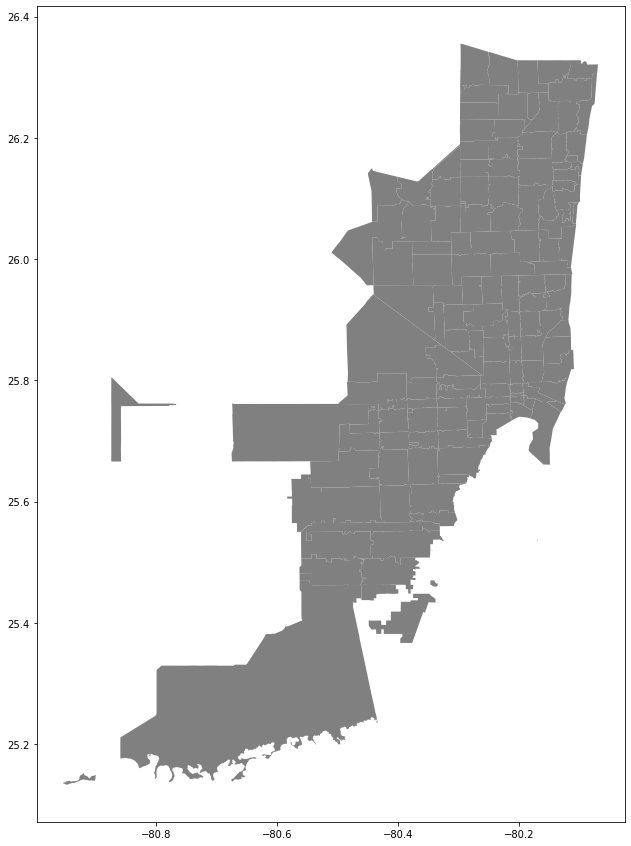

In [18]:
map_df.plot(figsize = (15,15), color = 'grey')

In [19]:
geometry = [Point(xy) for xy in zip(schools["Longitude"], schools["Latitude"])]
geometry[:5]

In [20]:
crs = {'init': 'epsg:4326'}
schools_geo = gpd.GeoDataFrame(schools, crs = crs, geometry = geometry)

C:\Users\miguelb\AppData\Local\Continuum\anaconda3\lib\site-packages\geopandas\plotting.py:487: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  UserWarning,


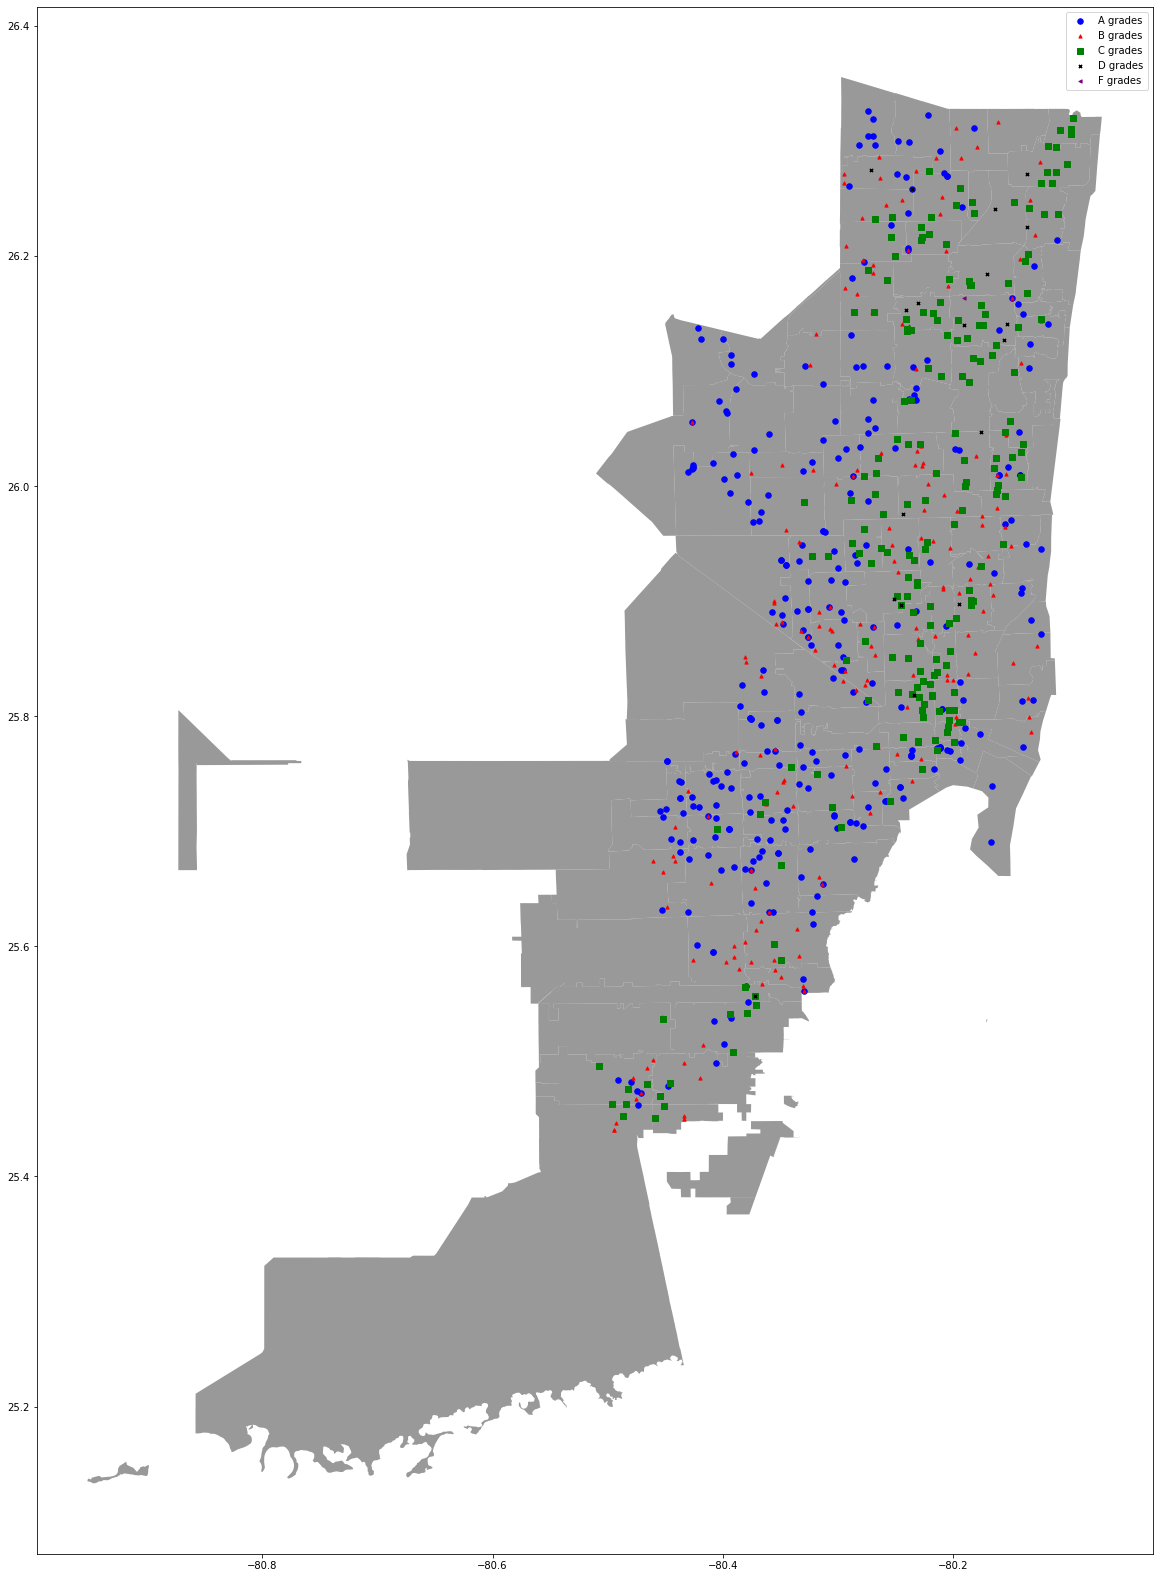

In [23]:
fig, ax = plt.subplots(figsize = (20, 30))
map_df.plot(ax = ax, alpha = 0.8, color = 'grey')
schools_geo[schools_geo['Grade 2019'] == 'A'].plot(ax = ax, markersize = 30, color = 'blue', marker = 'o', label = 'A grades')
schools_geo[schools_geo['Grade 2019'] == 'B'].plot(ax = ax, markersize = 10, color = 'red', marker = '^', label = 'B grades')
schools_geo[schools_geo['Grade 2019'] == 'C'].plot(ax = ax, markersize = 30, color = 'green', marker = 's', label = 'C grades')
schools_geo[schools_geo['Grade 2019'] == 'D'].plot(ax = ax, markersize = 10, color = 'black', marker = 'x', label = 'D grades')
schools_geo[schools_geo['Grade 2019'] == 'E'].plot(ax = ax, markersize = 10, color = 'cian', marker = '*', label = 'E grades')
schools_geo[schools_geo['Grade 2019'] == 'F'].plot(ax = ax, markersize = 10, color = 'purple', marker = '<', label = 'F grades')
plt.legend(prop={'size': 10})
